## Problem Statement

### Context


PCA FH (FT): Primary census abstract for female headed households excluding institutional households (India & States/UTs - District Level), Scheduled tribes - 2011 PCA for Female Headed Household Excluding Institutional Household. The Indian Census has the reputation of being one of the best in the world. The first Census in India was conducted in the year 1872. This was conducted at different points of time in different parts of the country. In 1881 a Census was taken for the entire country simultaneously. Since then, Census has been conducted every ten years, without a break. Thus, the Census of India 2011 was the fifteenth in this unbroken series since 1872, the seventh after independence and the second census of the third millennium and twenty first century. The census has been uninterruptedly continued despite of several adversities like wars, epidemics, natural calamities, political unrest, etc. The Census of India is conducted under the provisions of the Census Act 1948 and the Census Rules, 1990. The Primary Census Abstract which is important publication of 2011 Census gives basic information on Area, Total Number of Households, Total Population, Scheduled Castes, Scheduled Tribes Population, Population in the age group 0-6, Literates, Main Workers and Marginal Workers classified by the four broad industrial categories, namely, (i) Cultivators, (ii) Agricultural Laborers, (iii) Household Industry Workers, and (iv) Other Workers and also Non-Workers. The characteristics of the Total Population include Scheduled Castes, Scheduled Tribes, Institutional and Houseless Population and are presented by sex and rural-urban residence. Census 2011 covered 35 States/Union Territories, 640 districts, 5,924 sub-districts, 7,935 Towns and 6,40,867 Villages.
The data collected has so many variables thus making it difficult to find useful details without using Data Science Techniques. You are tasked to perform detailed EDA and identify Optimum Principal Components that explains the most variance in data. Use Sklearn only.

Note: The 24 variables given in the Rubric is just for performing EDA. You will have to consider the entire dataset, including all the variables for performing PCA.
Data file - PCA India Data Census.xlsx

## Importing necessary libraries

In [90]:
# this will help in making the Python code more structured automatically (good coding practice)
# %load_ext nb_black

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

from scipy import stats


# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

#importing PCA and TSNE
from sklearn.decomposition import PCA

#to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

from scipy import stats

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
# run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')
# drive already mounted if mounted

Mounted at /content/drive


## Loading the dataset

In [91]:
data = pd.read_excel('/content/drive/MyDrive/Python Course/PCA+India+Data_Census.xlsx')

## Overview of the Dataset

The initial steps to get an overview of any dataset is to:
- observe the first few rows of the dataset, to check whether the dataset has been loaded properly or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns of the data

### Checking the shape of the dataset

In [92]:
# checking shape of the data

print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.") ## Complete the code to get the shape of data

There are 640 rows and 61 columns.


### Displaying few rows of the dataset

In [6]:
# viewing the first 5 rows of the data
data.head()

,State Code,Dist.Code,State,Area Name,No_HH,TOT_M,TOT_F,M_06,F_06,M_SC,F_SC,M_ST,F_ST,M_LIT,F_LIT,M_ILL,F_ILL,TOT_WORK_M,TOT_WORK_F,MAINWORK_M,MAINWORK_F,MAIN_CL_M,MAIN_CL_F,MAIN_AL_M,MAIN_AL_F,MAIN_HH_M,MAIN_HH_F,MAIN_OT_M,MAIN_OT_F,MARGWORK_M,MARGWORK_F,MARG_CL_M,MARG_CL_F,MARG_AL_M,MARG_AL_F,MARG_HH_M,MARG_HH_F,MARG_OT_M,MARG_OT_F,MARGWORK_3_6_M,MARGWORK_3_6_F,MARG_CL_3_6_M,MARG_CL_3_6_F,MARG_AL_3_6_M,MARG_AL_3_6_F,MARG_HH_3_6_M,MARG_HH_3_6_F,MARG_OT_3_6_M,MARG_OT_3_6_F,MARGWORK_0_3_M,MARGWORK_0_3_F,MARG_CL_0_3_M,MARG_CL_0_3_F,MARG_AL_0_3_M,MARG_AL_0_3_F,MARG_HH_0_3_M,MARG_HH_0_3_F,MARG_OT_0_3_M,MARG_OT_0_3_F,NON_WORK_M,NON_WORK_F
0,1,1,Jammu & Kashmir,Kupwara,7707,23388,29796,5862,6196,3,0,1999,2598,13381,11364,10007,18432,6723,3752,2763,1275,486,235,407,143,78,86,1792,811,3960,2477,619,580,2052,641,142,244,1147,1012,16665,26044,2810,1728,439,343,1372,389,110,198,889,798,1150,749,180,237,680,252,32,46,258,214
1,1,2,Jammu & Kashmir,Badgam,6218,19585,23102,4482,3733,7,6,427,517,10513,7891,9072,15211,6982,4200,4628,1733,1098,357,442,108,538,343,2550,925,2354,2467,384,661,915,547,369,627,686,632,12603,18902,1829,1752,261,432,729,399,293,449,546,472,525,715,123,229,186,148,76,178,140,160
2,1,3,Jammu & Kashmir,Leh(Ladakh),4452,6546,10964,1082,1018,3,6,5806,9723,4534,5840,2012,5124,2775,4800,1940,2923,519,1205,36,71,19,55,1366,1592,835,1877,360,1250,44,157,15,32,416,438,3771,6164,721,1689,316,1161,41,123,15,28,349,377,114,188,44,89,3,34,0,4,67,61
3,1,4,Jammu & Kashmir,Kargil,1320,2784,4206,563,677,0,0,2666,3968,1842,1962,942,2244,1002,1118,491,408,35,102,8,24,9,6,439,276,511,710,135,286,63,176,10,43,303,205,1782,3088,317,463,74,158,50,126,6,33,187,146,194,247,61,128,13,50,4,10,116,59
4,1,5,Jammu & Kashmir,Punch,11654,20591,29981,5157,4587,20,33,7670,10843,13243,13477,7348,16504,5717,7692,2523,2267,743,766,254,237,35,64,1491,1200,3194,5425,1327,2462,1037,1069,62,319,768,1575,14874,22289,2320,3497,862,1419,832,767,38,214,588,1097,874,1928,465,1043,205,302,24,105,180,478


### Creating a copy of original data

In [7]:
# copying the data to another variable to avoid any changes to original data
df_pca = data.copy()

### Checking the data types of the columns for the dataset

In [93]:
# checking datatypes and number of non-null values for each column
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 640 entries, 0 to 639
Data columns (total 61 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   State Code      640 non-null    int64 
 1   Dist.Code       640 non-null    int64 
 2   State           640 non-null    object
 3   Area Name       640 non-null    object
 4   No_HH           640 non-null    int64 
 5   TOT_M           640 non-null    int64 
 6   TOT_F           640 non-null    int64 
 7   M_06            640 non-null    int64 
 8   F_06            640 non-null    int64 
 9   M_SC            640 non-null    int64 
 10  F_SC            640 non-null    int64 
 11  M_ST            640 non-null    int64 
 12  F_ST            640 non-null    int64 
 13  M_LIT           640 non-null    int64 
 14  F_LIT           640 non-null    int64 
 15  M_ILL           640 non-null    int64 
 16  F_ILL           640 non-null    int64 
 17  TOT_WORK_M      640 non-null    int64 
 18  TOT_WORK_F

In [94]:
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
State Code,640.0,17.114062,9.426486,1.0,9.00,18.0,24.00,35.0
Dist.Code,640.0,320.500000,184.896367,1.0,160.75,320.5,480.25,640.0
No_HH,640.0,51222.871875,48135.405475,350.0,19484.00,35837.0,68892.00,310450.0
TOT_M,640.0,79940.576563,73384.511114,391.0,30228.00,58339.0,107918.50,485417.0
TOT_F,640.0,122372.084375,113600.717282,698.0,46517.75,87724.5,164251.75,750392.0
M_06,640.0,12309.098438,11500.906881,56.0,4733.75,9159.0,16520.25,96223.0
F_06,640.0,11942.300000,11326.294567,56.0,4672.25,8663.0,15902.25,95129.0
M_SC,640.0,13820.946875,14426.373130,0.0,3466.25,9591.5,19429.75,103307.0
F_SC,640.0,20778.392188,21727.887713,0.0,5603.25,13709.0,29180.00,156429.0
M_ST,640.0,6191.807813,9912.668948,0.0,293.75,2333.5,7658.00,96785.0


In [11]:
df_pca.duplicated().sum()

0

In [12]:
# checking the number of unique values in each column
df_pca.nunique()

State Code         35
Dist.Code         640
State              35
Area Name         635
No_HH             639
TOT_M             639
TOT_F             639
M_06              636
F_06              629
M_SC              592
F_SC              592
M_ST              557
F_ST              559
M_LIT             639
F_LIT             639
M_ILL             634
F_ILL             640
TOT_WORK_M        639
TOT_WORK_F        635
MAINWORK_M        636
MAINWORK_F        638
MAIN_CL_M         617
MAIN_CL_F         621
MAIN_AL_M         612
MAIN_AL_F         617
MAIN_HH_M         520
MAIN_HH_F         551
MAIN_OT_M         637
MAIN_OT_F         631
MARGWORK_M        627
MARGWORK_F        631
MARG_CL_M         553
MARG_CL_F         584
MARG_AL_M         605
MARG_AL_F         617
MARG_HH_M         389
MARG_HH_F         507
MARG_OT_M         604
MARG_OT_F         602
MARGWORK_3_6_M    639
MARGWORK_3_6_F    639
MARG_CL_3_6_M     622
MARG_CL_3_6_F     627
MARG_AL_3_6_M     526
MARG_AL_3_6_F     566
MARG_HH_3_

### Checking the missing values

In [13]:
# checking for missing values
df_pca.isnull().sum()

State Code        0
Dist.Code         0
State             0
Area Name         0
No_HH             0
TOT_M             0
TOT_F             0
M_06              0
F_06              0
M_SC              0
F_SC              0
M_ST              0
F_ST              0
M_LIT             0
F_LIT             0
M_ILL             0
F_ILL             0
TOT_WORK_M        0
TOT_WORK_F        0
MAINWORK_M        0
MAINWORK_F        0
MAIN_CL_M         0
MAIN_CL_F         0
MAIN_AL_M         0
MAIN_AL_F         0
MAIN_HH_M         0
MAIN_HH_F         0
MAIN_OT_M         0
MAIN_OT_F         0
MARGWORK_M        0
MARGWORK_F        0
MARG_CL_M         0
MARG_CL_F         0
MARG_AL_M         0
MARG_AL_F         0
MARG_HH_M         0
MARG_HH_F         0
MARG_OT_M         0
MARG_OT_F         0
MARGWORK_3_6_M    0
MARGWORK_3_6_F    0
MARG_CL_3_6_M     0
MARG_CL_3_6_F     0
MARG_AL_3_6_M     0
MARG_AL_3_6_F     0
MARG_HH_3_6_M     0
MARG_HH_3_6_F     0
MARG_OT_3_6_M     0
MARG_OT_3_6_F     0
MARGWORK_0_3_M    0


<Axes: >

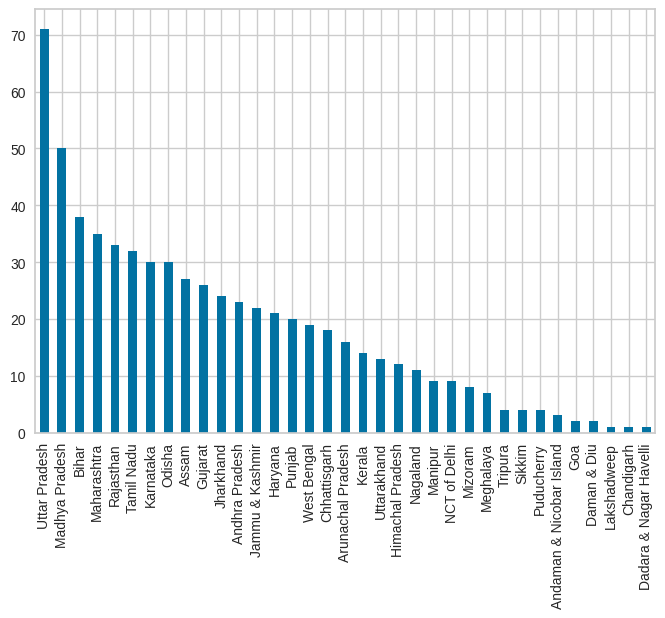

In [95]:
df_pca['State'].value_counts().plot(kind='bar')

#### (i) Which state has the highest gender ratio, and which has the lowest?

In [100]:
# (i) Which state has the highest gender ratio, and which has the lowest?
gender_ratio = data.groupby('State').agg({'TOT_M': 'sum', 'TOT_F': 'sum'})
gender_ratio['gender_ratio'] = gender_ratio['TOT_M'] / gender_ratio['TOT_F']
gender_ratio.sort_values(by='gender_ratio', ascending=False)
highest_gr_state = data.sort_values('gender_ratio', ascending=False)['State'].iloc[0]
lowest_gr_state = data.sort_values('gender_ratio')['State'].iloc[0]
print(f"The State  with the highest gender ratio is {highest_gr_state}.")
print(f"The State  with the lowest gender ratio is {lowest_gr_state}.")

The State  with the highest gender ratio is Lakshadweep.
The State  with the lowest gender ratio is Andhra Pradesh.


###(ii) Which District has the highest and lowest gender ratio?

In [98]:
# (ii) Which District has the highest and lowest gender ratio?
data['gender_ratio'] = data['TOT_M'] / data['TOT_F']
highest_gr_district = data.sort_values('gender_ratio', ascending=False)['Area Name'].iloc[0]
lowest_gr_district = data.sort_values('gender_ratio')['Area Name'].iloc[0]
print(f"The Distict  with the highest gender ratio is {highest_gr_district}.")
print(f"The District  with the lowest gender ratio is {lowest_gr_district}.")

The Distict  with the highest gender ratio is Lakshadweep.
The District  with the lowest gender ratio is Krishna.


### we can choose five variables out of the 24 variables given for EDA.

In [20]:
selected_variables = ['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06']
eda_data = data[selected_variables]

##Check for outliers:

No_HH
Skew : 2.02


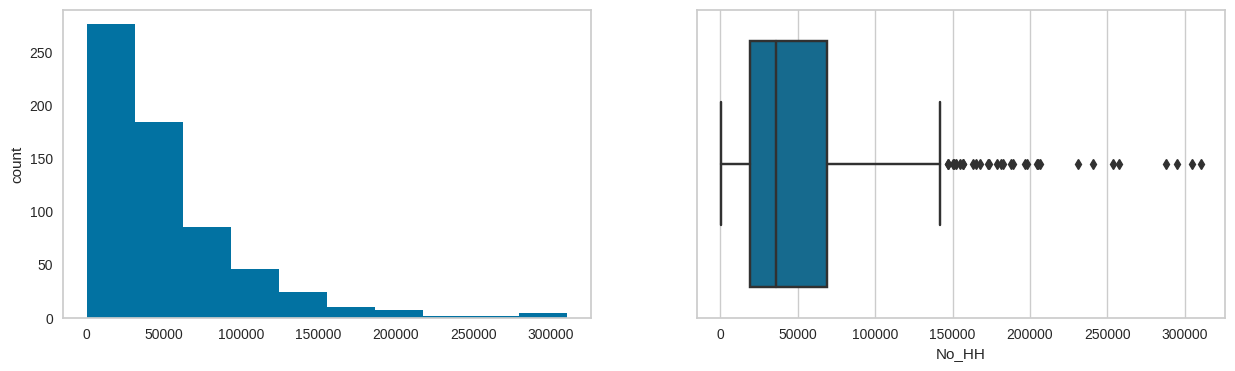

TOT_M
Skew : 2.03


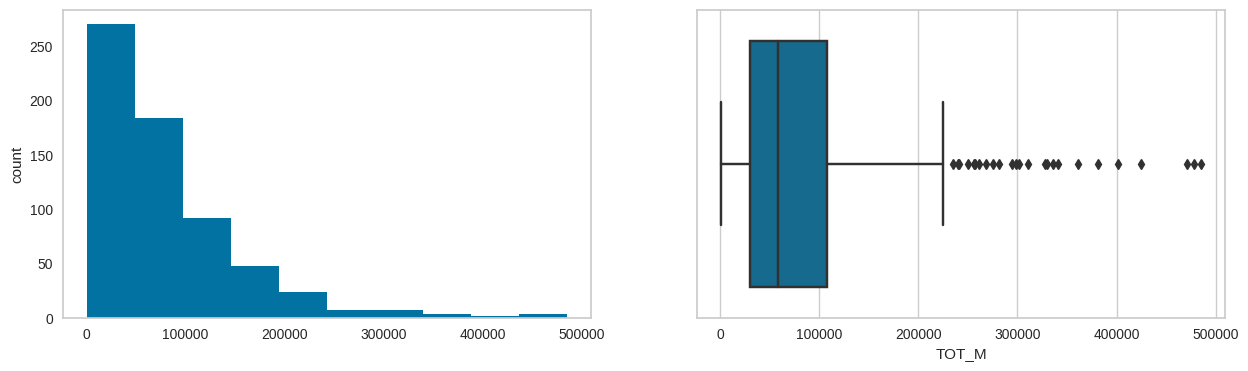

TOT_F
Skew : 2.11


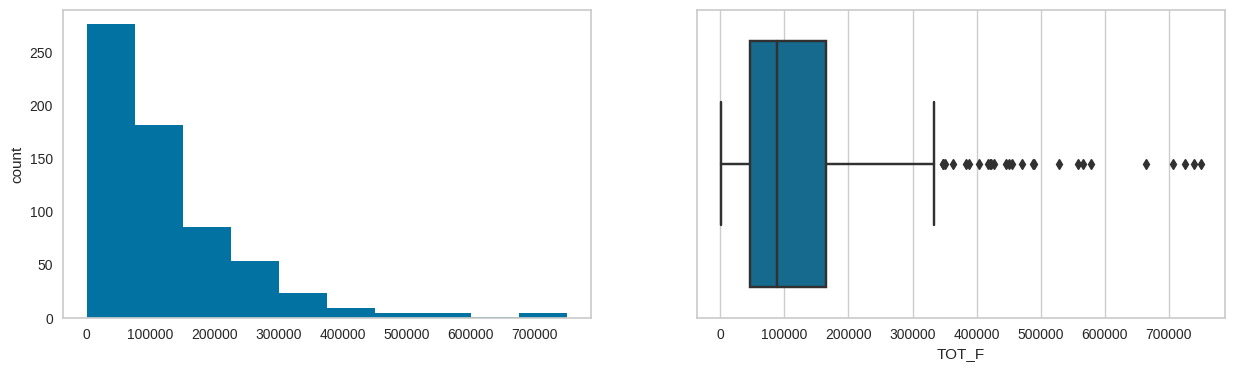

M_06
Skew : 2.19


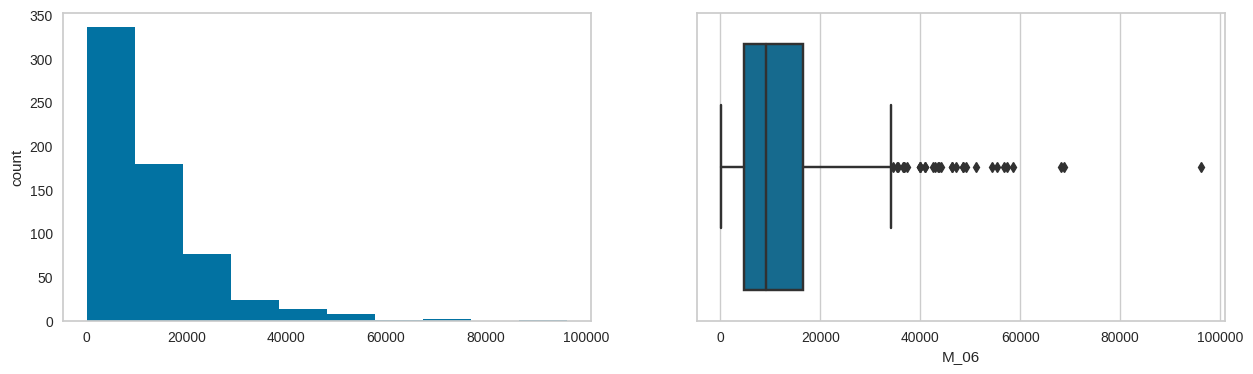

F_06
Skew : 2.23


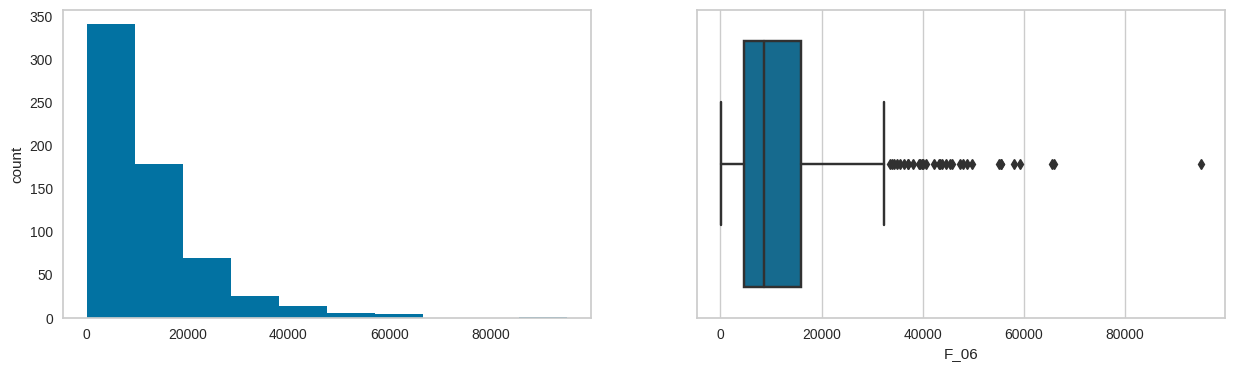

In [26]:
for col in eda_data.columns:
    print(col)
    print('Skew :',round(eda_data[col].skew(),2))
    plt.figure(figsize=(15,4))
    plt.subplot(1,2,1)
    eda_data[col].hist(bins=10, grid=False)
    plt.ylabel('count')
    plt.subplot(1,2,2)
    sns.boxplot(x=eda_data[col])
    plt.show()

In [27]:
def treat_outliers_iqr(data_with_outliers):
    # Calculate Q1, Q3, and IQR for each column
    Q1 = data_with_outliers.quantile(0.25)
    Q3 = data_with_outliers.quantile(0.75)
    IQR = Q3 - Q1

    # Calculate lower and upper bounds for each column
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Use np.clip to treat outliers for the entire DataFrame
    data = data_with_outliers.apply(lambda x: np.clip(x, lower_bound[x.name],
                                                      upper_bound[x.name]))

    return data

In [29]:
treat_outliers_iqr(eda_data)

,No_HH,TOT_M,TOT_F,M_06,F_06
0,7707,23388.0,29796.0,5862,6196.0
1,6218,19585.0,23102.0,4482,3733.0
2,4452,6546.0,10964.0,1082,1018.0
3,1320,2784.0,4206.0,563,677.0
4,11654,20591.0,29981.0,5157,4587.0
...,...,...,...,...,...
635,3333,8154.0,11781.0,1146,1203.0
636,10612,12346.0,21691.0,1544,1533.0
637,1275,1549.0,2630.0,227,225.0
638,3762,5200.0,8012.0,723,664.0


In [30]:
my_list = ['a', 'b', 'c']
for i, j in enumerate(my_list):
  print(i, j)

0 a
1 b
2 c


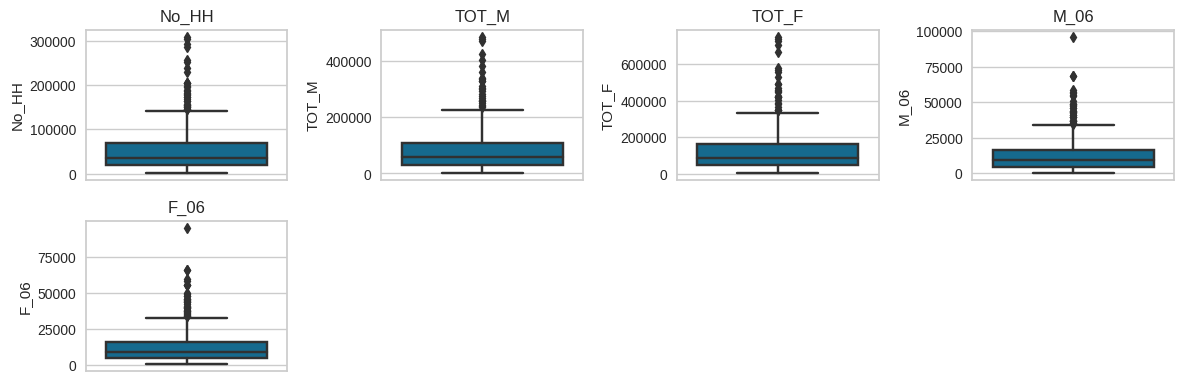

In [31]:
plt.figure(figsize = (12,4))
for i, col in enumerate(eda_data.columns):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)  # Add column name as title

plt.tight_layout()
plt.show()

Checking Correlation

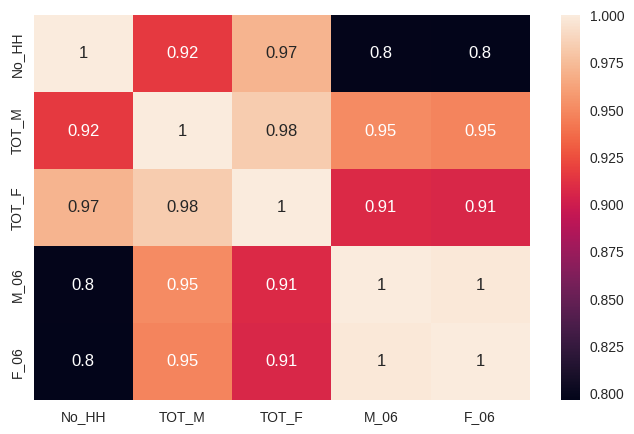

In [32]:
plt.figure(figsize=(8,5))
sns.heatmap(eda_data.corr(), annot=True)
plt.show()

##Scaling the Data

In [102]:
selected_variables = ['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06']
eda_data = data[selected_variables]

In [103]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(eda_data)

In [106]:
from scipy.stats import zscore
df_num_scaled=eda_data.apply(zscore)
df_num_scaled.head()

,No_HH,TOT_M,TOT_F,M_06,F_06
0,-0.904738,-0.771236,-0.815563,-0.561012,-0.507738
1,-0.935695,-0.823100,-0.874534,-0.681096,-0.725367
2,-0.972412,-1.000919,-0.981466,-0.976956,-0.965262
3,-1.037530,-1.052224,-1.041001,-1.022118,-0.995393
4,-0.822676,-0.809381,-0.813933,-0.622359,-0.649908


##Scaling can affect the outliers by changing their values, but it does not remove them. We can compare the boxplots before and after scaling to see the impact on outliers.

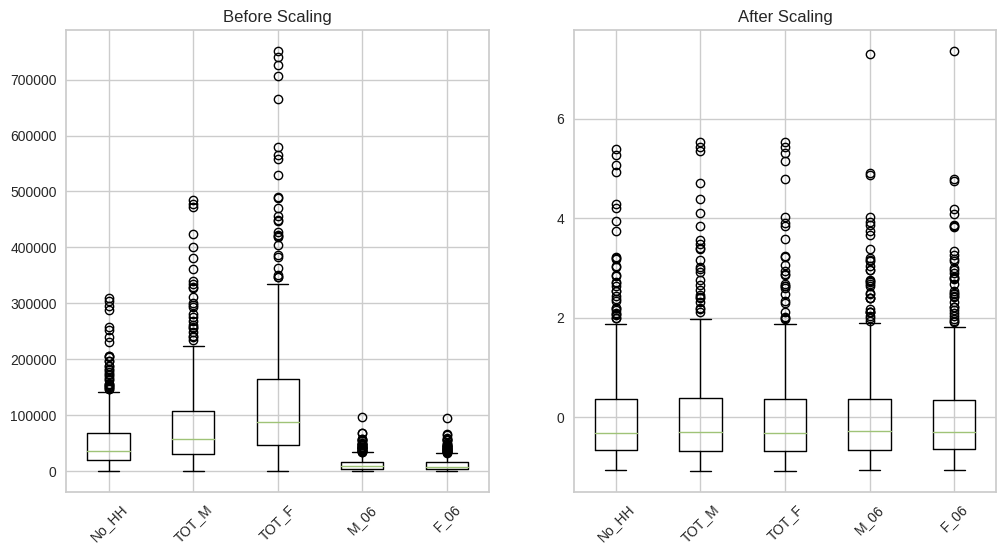

In [33]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].boxplot(eda_data.values)
axes[0].set_xticklabels(selected_variables, rotation=45)
axes[0].set_title('Before Scaling')

axes[1].boxplot(scaled_data)
axes[1].set_xticklabels(selected_variables, rotation=45)
axes[1].set_title('After Scaling')
plt.show()

###Perform PCA


In [107]:
pca = PCA()
pca.fit(scaled_data)
covariance_matrix = pca.get_covariance()
explained_variance = pca.explained_variance_ratio_

# Get eigenvalues and eigenvectors
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)

# Get the principal components
pca_components = pca.transform(scaled_data)

### Scale the Data using Zscore Method

In [69]:
selected_variables = ['No_HH', 'TOT_M', 'TOT_F', 'M_06', 'F_06', 'M_SC', 'F_SC', 'M_ST', 'F_ST', 'M_LIT', 'F_LIT', 'M_ILL', 'F_ILL', 'TOT_WORK_M', 'TOT_WORK_F', 'MAINWORK_M', 'MAINWORK_F', 'MAIN_CL_M', 'MAIN_CL_F', 'MAIN_AL_M', 'MAIN_AL_F', 'MAIN_HH_M', 'MAIN_HH_F','MAIN_HH_M']
eda_data1 = data[selected_variables]

In [70]:
# Scale data using z-score method
scaler = StandardScaler()
data_scaled = scaler.fit_transform(eda_data1)

# Perform PCA
pca = PCA(n_components=24)
pca.fit(data_scaled)



PCA(n_components=24)

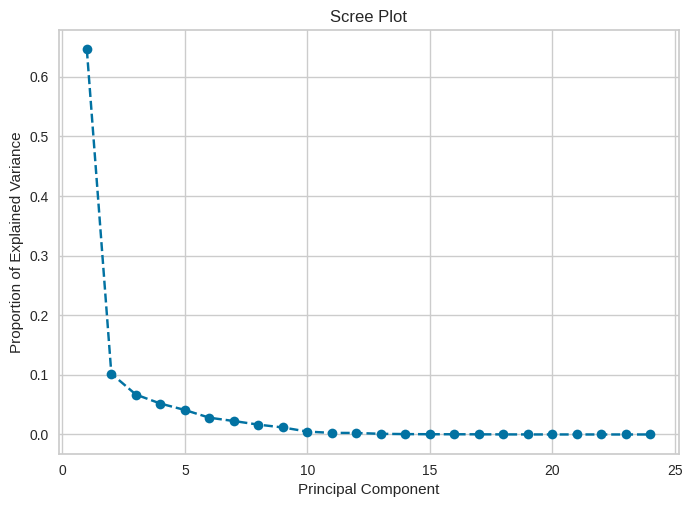

In [71]:
# Scree plot
plt.plot(range(1,25), pca.explained_variance_ratio_, marker = 'o', linestyle = '--')
#plt.plot(np.arange(1, 25), pca.explained_variance_ratio_, 'o-', linewidth=2)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Explained Variance')
plt.show()

In [86]:
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
#print (loadings)

# Create table of loadings
#loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'],index=eda_data1.columns)
loading_matrix = pd.DataFrame(loadings, columns=['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7', 'PC8', 'PC9', 'PC10','PC11','PC12','PC13', 'PC14', 'PC15', 'PC16','PC17','PC18','PC19', 'PC20', 'PC21', 'PC22','PC23','PC24'],index=eda_data1.columns)



In [87]:
# Show table sorted by PC1 loadings
loading_matrix.sort_values('PC1', ascending=False)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24
TOT_F,0.976837,-0.042508,0.126860,0.030172,-0.145558,0.040606,0.028880,0.016806,-0.004983,0.023803,-0.058048,0.003980,-0.005092,0.010307,-0.002218,-0.002613,-0.011889,-0.013365,0.010509,0.005383,-0.003212,2.995487e-17,5.045227e-17,-3.924341e-17
TOT_M,0.971085,-0.132210,0.135699,-0.087106,-0.100343,0.008353,0.046253,0.016365,0.016304,0.003434,0.022548,-0.004539,-0.022147,-0.014443,0.000983,0.000251,-0.030291,0.004871,-0.005791,-0.005636,0.004442,1.389259e-16,1.312678e-16,1.294558e-17
TOT_WORK_M,0.962974,-0.089059,0.172254,0.057946,-0.054318,0.009529,-0.037068,-0.038297,0.135624,-0.042138,0.039962,0.042659,-0.038593,-0.024951,0.006998,0.030005,0.015187,-0.008165,-0.016721,0.005134,-0.012376,-2.676514e-31,5.812470e-33,1.459864e-32
M_LIT,0.956773,-0.134921,0.190662,-0.005288,-0.136287,0.064218,-0.001547,-0.010518,0.037997,0.049889,0.009216,-0.018860,-0.036925,-0.038992,0.004741,-0.013826,-0.033509,0.006280,-0.007823,-0.005699,0.005344,-1.058450e-16,-1.000104e-16,-9.862992e-18
No_HH,0.948326,0.067300,0.084132,0.198024,-0.158814,0.028462,-0.011649,-0.007139,0.010940,0.011391,-0.135850,0.053340,-0.001693,0.049956,0.008138,-0.001854,0.017545,0.025249,-0.011380,-0.000686,0.003170,1.137800e-31,3.282053e-31,1.137658e-31
F_ILL,0.940527,0.087902,-0.161351,-0.098190,0.031781,-0.117504,0.096084,0.050177,-0.118625,-0.142146,-0.078681,0.025907,-0.065637,-0.009232,0.007871,-0.034236,-0.004914,-0.011302,0.007021,0.005519,-0.002353,-1.242399e-17,-2.092543e-17,1.627648e-17
MAINWORK_M,0.930236,-0.075424,0.187415,0.149184,-0.069751,0.050882,-0.071055,-0.040159,0.208505,-0.039258,0.094960,0.036424,-0.045172,0.014017,-0.005716,-0.013064,0.030798,0.000356,0.014867,-0.003126,0.007800,1.883473e-31,2.324988e-32,-1.021905e-32
TOT_WORK_F,0.898294,0.300577,-0.045322,0.226760,-0.060523,0.125100,-0.044943,0.017291,-0.072659,-0.114679,-0.043537,-0.011663,0.047811,-0.068018,0.006787,0.039240,0.009380,0.006351,0.008354,-0.001511,0.004454,1.486952e-32,1.162494e-32,-5.839458e-33
M_06,0.897999,-0.172801,0.073695,-0.295103,-0.132125,-0.018522,0.178071,0.085831,-0.085994,0.053508,0.025620,-0.056093,0.011248,-0.014638,0.003224,-0.016529,0.021586,0.021827,0.008353,-0.009640,-0.010972,-2.329558e-31,9.009328e-32,-6.934356e-33
F_06,0.896679,-0.162277,0.076176,-0.298119,-0.127543,-0.022002,0.188240,0.094373,-0.087204,0.046728,0.018489,-0.051944,0.030726,-0.009064,-0.002328,-0.008240,0.030067,-0.016288,-0.011699,0.010258,0.009484,6.939110e-32,8.718705e-33,1.788334e-32
